=> 최종목표: 현재까지 활동하고 있는 가수들의 장르를 분석하고, 이를 기존 장르데이터에 비교해본 뒤, 현재 음악 트랜드를 알아본다

In [152]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
from matplotlib import font_manager,rc

import random

font_location = "C:\Windows\Fonts\malgun.ttf"
font_name = font_manager.FontProperties(fname=font_location).get_name()
rc('font',family=font_name)
plt.rcParams['axes.unicode_minus'] = False

In [153]:
file_path = '../data/best_selling_artists.csv'
artist = pd.read_csv(file_path) # read_csv 함수로 데이터를 Dataframe 형태로 불러옵니다.

## 데이터 원본분석

In [154]:
artist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 121 entries, 0 to 120
Data columns (total 7 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Artist         121 non-null    object
 1   Country        121 non-null    object
 2   period_active  121 non-null    object
 3   Year           121 non-null    int64 
 4   Genre          121 non-null    object
 5   TCU            121 non-null    object
 6   Sales          121 non-null    object
dtypes: int64(1), object(6)
memory usage: 6.7+ KB


In [155]:
artist.columns

Index(['Artist', 'Country', 'period_active', 'Year', 'Genre', 'TCU', 'Sales'], dtype='object')

* Artist          : 아티스트 이름
* Country         : 아티스트가 출신 국가
* period_active   : 아티스트가 음악을 만든 시간
* Year            : 음반차트 첫 진입년도
* Genre           : 아티스트의 음악 장르
* TCU             : 인증받은 판매량
* Sales           : 알려진 판매량 

In [156]:
artist.shape

(121, 7)

In [157]:
artist.head(10)

,Artist,Country,period_active,Year,Genre,TCU,Sales
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290.4 million,600 million500 million
1,Elvis Presley,United States,1954–1977,1956,Rock and roll / pop / country,231.2 million,500 million
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277.3 million,400 million
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208 million,300 million250 million
4,Queen,United Kingdom,1971–present,1973,Rock,184 million,300 million250 million
5,Madonna,United States,1979–present,1983,Pop / dance / electronica,181.7 million,300 million250 million
6,Led Zeppelin,United Kingdom,1968–1980,1969,Hard rock / blues rock / folk rock,142.4 million,300 million200 million
7,Rihanna,Barbados,2005–present,2005,R&B / pop / dance / hip-hop,335.3 million,250 million230 million
8,Pink Floyd,United Kingdom,"1965–1996, 2005, 2012–2014",1967,Progressive rock / psychedelic rock,123.8 million,250 million200 million
9,Eminem,United States,1996–present,1999,Hip-hop,325.7 million,220 million


In [158]:
artist.tail(10)

,Artist,Country,period_active,Year,Genre,TCU,Sales
111,Kenny G,United States,1982–present,1984,Smooth jazz,53.9 million,75 million
112,Green Day,United States,1987–present,1994,Punk rock / pop punk / alternative rock,53 million,75 million
113,Enya,Ireland,1982–present,1987,New-age / Celtic,51.9 million,75 million
114,Bryan Adams,Canada,1979–present,1979,Rock,49.9 million,75 million
115,Bob Marley,Jamaica,1962–1981,1975,Reggae,46.3 million,75 million
116,The Police,United Kingdom,1977–19862007–2008,1978,Pop / rock,42.2 million,75 million
117,Gloria Estefan,United States,1975–present,1984,Latin pop / dance pop,37.6 million,75 million
118,Barry Manilow,United States,1973–present,1973,Pop / soft rock,36.7 million,75 million
119,Kiss,United States,1972–present,1974,Hard rock / heavy metal,28.7 million,75 million
120,Aretha Franklin,United States,1956–2018,1961,Soul / jazz / blues / R&B,26.6 million,75 million


#### => 'sales'는 인증되지않은판매량이므로 인증된 수치인 'TCU'만 사용

In [159]:
artist = artist.drop(['Sales'], axis = 1)

In [160]:
artist

,Artist,Country,period_active,Year,Genre,TCU
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290.4 million
1,Elvis Presley,United States,1954–1977,1956,Rock and roll / pop / country,231.2 million
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277.3 million
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208 million
4,Queen,United Kingdom,1971–present,1973,Rock,184 million
...,...,...,...,...,...,...
116,The Police,United Kingdom,1977–19862007–2008,1978,Pop / rock,42.2 million
117,Gloria Estefan,United States,1975–present,1984,Latin pop / dance pop,37.6 million
118,Barry Manilow,United States,1973–present,1973,Pop / soft rock,36.7 million
119,Kiss,United States,1972–present,1974,Hard rock / heavy metal,28.7 million


## 결측치, 이상치 점검

In [161]:
artist['TCU'] = artist.TCU.str.split(' ').str[0].astype('float64')

In [162]:
artist['TCU'] = artist['TCU']*1000000

In [163]:
artist['TCU']

0      290400000.0
1      231200000.0
2      277300000.0
3      208000000.0
4      184000000.0
          ...     
116     42200000.0
117     37600000.0
118     36700000.0
119     28700000.0
120     26600000.0
Name: TCU, Length: 121, dtype: float64

In [164]:
artist.isnull().sum()

Artist           0
Country          0
period_active    0
Year             0
Genre            0
TCU              0
dtype: int64

In [166]:
# artist['Debut']=artist.period_active.str.split('–').str[0].astype('int64') #데뷔년도

In [167]:
# artist['Year']=artist['Year'].astype('int64')

In [168]:
# artist['Cart_In_period']=artist['Year']-artist['Debut'] #차트인하기까지 걸린 시간

In [169]:
# sort_by_cartin=artist[['Artist','Cart_In_period']]
# sort_by_cartin=sort_by_cartin.sort_values('Cart_In_period',ascending=0)
# sort_by_cartin.head()

In [170]:
# cartin_avg=sort_by_cartin['Cart_In_period'].mean()

In [171]:
# plt.title('차트인을 늦게 한 가수들')
# plt.xticks(rotation = -45)
# sns.barplot(x='Artist',y='Cart_In_period',data=sort_by_cartin.head(10))
# plt.plot([0,10], [cartin_avg, cartin_avg], "k--")
# plt.show()

## 탐색적 데이터 분석

### step1
현재까지 활동하고 있는 가수 중 가장 사랑받는 장르는 무엇일까? 그리고 년도별 사랑받는 장르는 무엇일까?

### 년도별 인기있는 장르 분석
=> 1960, 70, 80, 90, 2000년대 이후

In [172]:
artist_year_1960 = artist.loc[(artist['Year'] >= 1960) & (artist['Year'] <= 1969)]

artist_year_1960.head()

,Artist,Country,period_active,Year,Genre,TCU
0,The Beatles,United Kingdom,1960–1970,1962,Rock / pop,290400000.0
6,Led Zeppelin,United Kingdom,1968–1980,1969,Hard rock / blues rock / folk rock,142400000.0
8,Pink Floyd,United Kingdom,"1965–1996, 2005, 2012–2014",1967,Progressive rock / psychedelic rock,123800000.0
17,The Rolling Stones,United Kingdom,1962–present,1963,Rock / blues rock,102700000.0
29,Barbra Streisand,United States,1960–present,1963,Pop / adult contemporary,98400000.0


In [173]:
df=pd.DataFrame(index=['count'])

In [174]:
Genre=artist['Genre'].str.split("/")

In [175]:
genre_list=[]
for genres in Genre:
    for genre in genres:
        if genre.strip().lower() not in genre_list:
            genre_list.append(genre.strip().lower())
genre_list

['rock',
 'pop',
 'rock and roll',
 'country',
 'dance',
 'soul',
 'r&b',
 'electronica',
 'hard rock',
 'blues rock',
 'folk rock',
 'hip-hop',
 'progressive rock',
 'psychedelic rock',
 'folk',
 'alternative',
 'gospel',
 'electronic',
 'teen pop',
 'dance pop',
 'folk pop',
 'pop rock',
 'adult contemporary',
 'disco',
 'swing',
 'easy listening',
 'heavy metal',
 'thrash metal',
 'funk rock',
 'dance-pop',
 'alternative rock',
 'glam metal',
 'nu metal',
 'rap rock',
 'country pop',
 'blues',
 'funk',
 'soft rock',
 'latin',
 'art rock',
 'glam rock',
 'surf rock',
 'neo soul',
 'hip house',
 'edm',
 'latin pop',
 'j-pop',
 'electropop',
 'grunge',
 'smooth jazz',
 'punk rock',
 'pop punk',
 'new-age',
 'celtic',
 'reggae',
 'jazz']

In [176]:
for genre in genre_list:
     df[genre]= artist_year_1960.loc[artist_year_1960['Genre'].str.contains(genre,case=0),'TCU'].count()

In [177]:
df.T.reset_index(inplace=True)

In [183]:
df.T.head()

,count
rock,20
pop,16
rock and roll,0
country,1
dance,1


In [179]:
artist_year_1960 = df.T.sort_values(by='count',ascending=0)
artist_year_1960[artist_year_1960['count']!=0]

,count
rock,20
pop,16
folk,5
blues,3
pop rock,2
psychedelic rock,2
progressive rock,2
folk rock,2
blues rock,2
hard rock,2


In [83]:
artist_year_1960.reset_index(inplace=True)

In [88]:
artist_year_1960=artist_year_1960[artist_year_1960['count']!=0]

In [89]:
artist_year_1960.columns = ['Genre','count']

artist_year_1960

,Genre,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


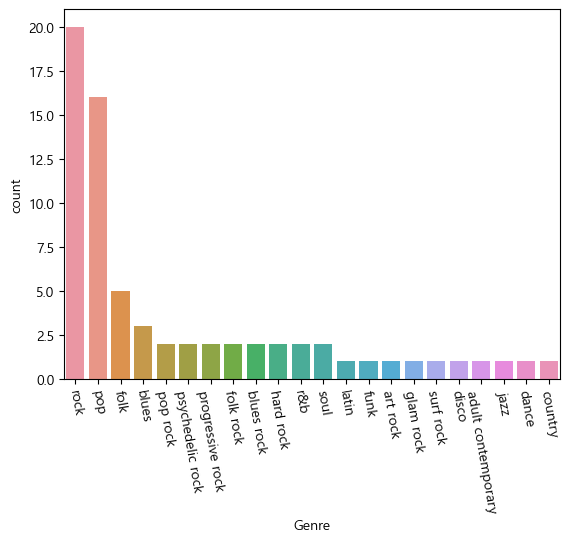

In [90]:
plt.xticks(rotation = -80)
sns.barplot(x='Genre',y='count',data=artist_year_1960)
plt.show()

=> 60년대에 가장 인기있었던 장르는 Rock / pop , pop 순이다

1970년대

In [91]:
artist_year_1970 = artist.loc[(artist['Year'] >= 1970) & (artist['Year'] <= 1979)]

artist_year_1970.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
2,Michael Jackson,United States,1964–2009,1971,Pop / rock / dance / soul / R&B,277300000.0,1964,7
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208000000.0,1964,6
4,Queen,United Kingdom,1971–present,1973,Rock,184000000.0,1971,2
14,Eagles,United States,"1971–1980, 1994–present",1972,Rock,152200000.0,1971,1
16,AC/DC,Australia,1973–present,1975,Hard rock / blues rock / rock and roll,130200000.0,1973,2


In [94]:
artist_year_1970 = df.T.sort_values(by='count',ascending=0)

artist_year_1970=artist_year_1970[artist_year_1970['count']!=0]

In [95]:
artist_year_1970.reset_index(inplace=True)

In [96]:
artist_year_1970

,index,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


In [97]:
artist_year_1970.columns = ['Genre','count']

artist_year_1970

,Genre,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


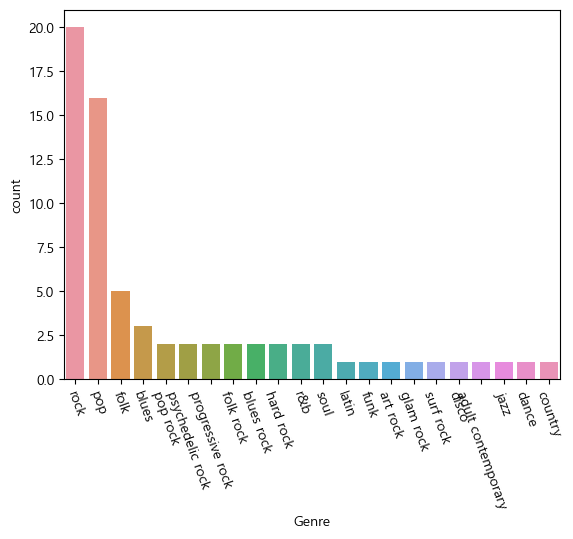

In [98]:
plt.xticks(rotation = -70)
sns.barplot(x='Genre',y='count',data=artist_year_1970)
plt.show()

=> 70년대 가장 인기있었던 장르는 Rock, Hard rock / heavy metal 순이다

In [99]:
artist_year_1980 = artist.loc[(artist['Year'] >= 1980) & (artist['Year'] <= 1989)]

artist_year_1980.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
5,Madonna,United States,1979–present,1983,Pop / dance / electronica,181700000.0,1979,4
13,Whitney Houston,United States,1977–2012,1984,R&B / soul / pop / gospel,155300000.0,1977,7
15,Celine Dion,Canada,1981–present,1981,Pop / Rock,143000000.0,1981,0
19,Garth Brooks,United States,1989–present,1989,Country,165300000.0,1989,0
26,U2,Ireland,1976–present,1980,Rock,114600000.0,1976,4


In [100]:
artist_year_1980 = df.T.sort_values(by='count',ascending=0)

artist_year_1980=artist_year_1980[artist_year_1980['count']!=0]

In [101]:
artist_year_1980.reset_index(inplace=True)

In [102]:
artist_year_1980

,index,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


In [103]:
artist_year_1980.columns = ['Genre','count']

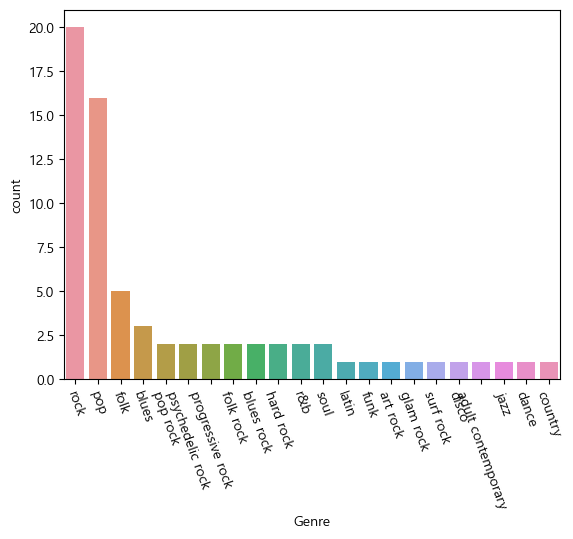

In [104]:
plt.xticks(rotation = -70)
sns.barplot(x='Genre',y='count',data=artist_year_1980)
plt.show()

=> 80년대는 Country가 가장 인기있는 장르지만, 
가장 많은 데이터와 편차가 심하지않고 다른 데이터가 골고루 분산되서 많은 장르가 사랑받은것으로 보임.

1990년대

In [105]:
artist_year_1990 = artist.loc[(artist['Year'] >= 1990) & (artist['Year'] <= 1999)]

artist_year_1990.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
9,Eminem,United States,1996–present,1999,Hip-hop,325700000.0,1996,3
10,Mariah Carey,United States,1988–present,1990,R&B / pop / soul / hip-hop,205800000.0,1988,2
34,Jay-Z,United States,1996–present,1996,Hip-hop,136400000.0,1996,0
37,Lil Wayne,United States,1996–present,1999,Hip-hop,188700000.0,1996,3
46,Coldplay,United Kingdom,1996–present,1999,Alternative rock / pop rock / pop,109400000.0,1996,3


In [106]:
artist_year_1990 = df.T.sort_values(by='count',ascending=0)

artist_year_1990=artist_year_1990[artist_year_1990['count']!=0]

In [107]:
artist_year_1990.reset_index(inplace=True)

In [108]:

artist_year_1990

,index,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


In [109]:
artist_year_1990.columns = ['Genre','count']

In [110]:
artist_year_1990

,Genre,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


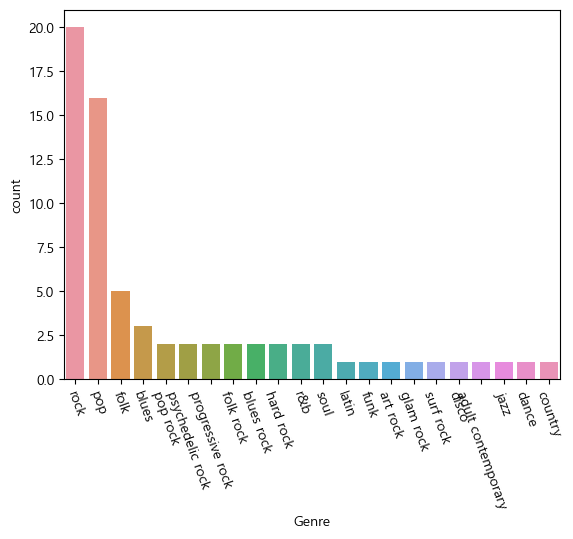

In [111]:
plt.xticks(rotation = -70)
sns.barplot(x='Genre',y='count',data=artist_year_1990)
plt.show()

=> 1990년대에 가장 인기있었던 장르는 Hip-hop이다

2000년 이후

In [55]:
artist_year_2000 = artist.loc[(artist['Year'] >= 2000)]

artist_year_2000.head()

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period
7,Rihanna,Barbados,2005–present,2005,R&B / pop / dance / hip-hop,335300000.0,2005,0
11,Taylor Swift,United States,2006–present,2006,Pop / country / rock / folk / alternative,250400000.0,2006,0
12,Beyoncé,United States,1997–present,2002,R&B / pop,226500000.0,1997,5
18,Drake,Canada,2001–present,2009,Hip-hop / R&B / pop,413060000.0,2001,8
20,Kanye West,United States,1996–present,2003,Hip-hop / electronic / pop,258300000.0,1996,7


In [112]:
artist_year_2000 = df.T.sort_values(by='count',ascending=0)

artist_year_2000=artist_year_2000[artist_year_2000['count']!=0]

In [113]:
artist_year_2000.reset_index(inplace=True)

In [114]:
artist_year_2000

,index,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


In [115]:
artist_year_2000.columns = ['Genre','count']

artist_year_2000

,Genre,count
0,rock,20
1,pop,16
2,folk,5
3,blues,3
4,pop rock,2
5,psychedelic rock,2
6,progressive rock,2
7,folk rock,2
8,blues rock,2
9,hard rock,2


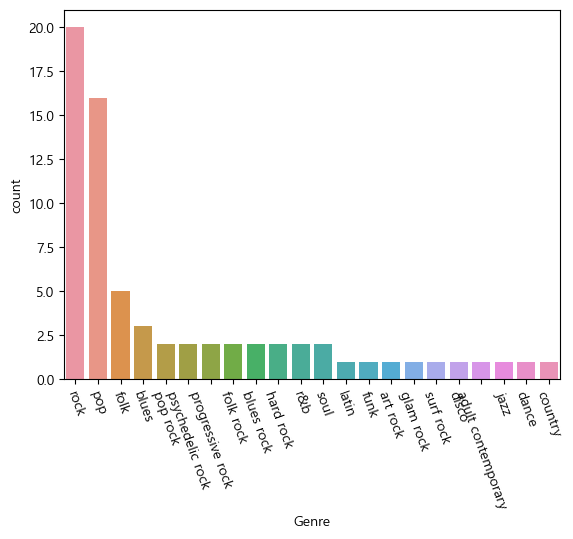

In [116]:
plt.xticks(rotation = -70)
sns.barplot(x='Genre',y='count',data=artist_year_1990)
plt.show()

=> 2000년대 이후는 Hip-hop / R&B / pop , Pop / R&B ... 
힙합과 알앤비 장르가 인기있는 장르이다.

In [117]:
artist.loc[artist['Country']=='United Kingdom United States','Country']='United Kingdom'

In [118]:
country_aritst=pd.DataFrame(artist.groupby('Country')['Artist'].count())
country_aritst.sort_values('Artist',ascending=0)

,Artist
Country,
United States,79
United Kingdom,21
Canada,5
Australia,2
Ireland,2
Japan,2
Barbados,1
CanadaUnited States,1
Colombia,1


In [119]:
artist.loc[artist['Country']=='CanadaUnited States','Country']='Canada'

In [120]:
artist.loc[artist['Country']=='United StatesUnited Kingdom','Country']='United States'

In [121]:
artist.loc[artist['Country']=='United Kingdom Australia[238][239]','Country']='Australia'

In [122]:
artist['Country'].unique()

array(['United Kingdom', 'United States', 'Barbados', 'Canada',
       'Australia', 'Ireland', 'Sweden', 'Trinidad and Tobago', 'Japan',
       'Spain', 'Colombia', 'France', 'Jamaica'], dtype=object)

#### => 2인이상 가수는 'country'가 멤버별 국적이 기재되므로 그룹이 만들어진 나라로 'country'를 하나로 통합하였다

### 2020년 현재까지 노래를 낸 아티스트 추출하고 장르 분석

In [123]:
artist['Until']=artist.period_active.str.split('–').str[-1]

In [124]:
# if artist.Until.str.contains('-'):
#     artist['Until']=artist.period_active.str.split('-').str[-1]

In [125]:
artist['Until']=artist['Until'].str.replace('present','2022')

In [126]:
artist['Until'].head()

0    1970
1    1977
2    2009
3    2022
4    2022
Name: Until, dtype: object

In [127]:
present_artist=artist[artist['Until']=='2022']
present_artist['Genre'].value_counts()

Rock                                 7
Rock / pop                           4
Pop / rock                           3
R&B / pop                            3
Pop                                  3
                                    ..
Hard rock / glam metal               1
Hip-hop / pop                        1
Alternative rock / pop rock / pop    1
Pop / pop rock / R&B                 1
Pop / soft rock                      1
Name: Genre, Length: 64, dtype: int64

In [128]:
#artist.groupby('Country')['Artist','Genre'].count()

In [129]:
Genre=artist['Genre'].str.split("/")

In [130]:
genre_list=[]
for genres in Genre:
    for genre in genres:
        if genre.strip().lower() not in genre_list:
            genre_list.append(genre.strip().lower())
genre_list

['rock',
 'pop',
 'rock and roll',
 'country',
 'dance',
 'soul',
 'r&b',
 'electronica',
 'hard rock',
 'blues rock',
 'folk rock',
 'hip-hop',
 'progressive rock',
 'psychedelic rock',
 'folk',
 'alternative',
 'gospel',
 'electronic',
 'teen pop',
 'dance pop',
 'folk pop',
 'pop rock',
 'adult contemporary',
 'disco',
 'swing',
 'easy listening',
 'heavy metal',
 'thrash metal',
 'funk rock',
 'dance-pop',
 'alternative rock',
 'glam metal',
 'nu metal',
 'rap rock',
 'country pop',
 'blues',
 'funk',
 'soft rock',
 'latin',
 'art rock',
 'glam rock',
 'surf rock',
 'neo soul',
 'hip house',
 'edm',
 'latin pop',
 'j-pop',
 'electropop',
 'grunge',
 'smooth jazz',
 'punk rock',
 'pop punk',
 'new-age',
 'celtic',
 'reggae',
 'jazz']

In [131]:
present_artist.head(11)

,Artist,Country,period_active,Year,Genre,TCU,Debut,Cart_In_period,Until
3,Elton John,United Kingdom,1964–present,1970,Pop / rock,208000000.0,1964,6,2022
4,Queen,United Kingdom,1971–present,1973,Rock,184000000.0,1971,2,2022
5,Madonna,United States,1979–present,1983,Pop / dance / electronica,181700000.0,1979,4,2022
7,Rihanna,Barbados,2005–present,2005,R&B / pop / dance / hip-hop,335300000.0,2005,0,2022
9,Eminem,United States,1996–present,1999,Hip-hop,325700000.0,1996,3,2022
10,Mariah Carey,United States,1988–present,1990,R&B / pop / soul / hip-hop,205800000.0,1988,2,2022
11,Taylor Swift,United States,2006–present,2006,Pop / country / rock / folk / alternative,250400000.0,2006,0,2022
12,Beyoncé,United States,1997–present,2002,R&B / pop,226500000.0,1997,5,2022
14,Eagles,United States,"1971–1980, 1994–present",1972,Rock,152200000.0,1971,1,2022
15,Celine Dion,Canada,1981–present,1981,Pop / Rock,143000000.0,1981,0,2022


### 장르별 'TCU' 평균을 구하여 인기있는 장르를 분석

In [132]:
df=pd.DataFrame(index=['mean'])
df

""
mean


In [133]:
for genre in genre_list:
     df[genre]= present_artist.loc[present_artist['Genre'].str.contains(genre,case=0),'TCU'].mean()

In [141]:
favorite_genre=df.T.sort_values(by='mean',ascending=0).head()
favorite_genre

,mean
teen pop,2.779000e+08
folk pop,2.467000e+08
hip-hop,2.051508e+08
electronica,1.817000e+08
electronic,1.658750e+08


In [142]:
favorite_genre.reset_index(inplace = True)

In [143]:
favorite_genre

,index,mean
0,teen pop,2.779000e+08
1,folk pop,2.467000e+08
2,hip-hop,2.051508e+08
3,electronica,1.817000e+08
4,electronic,1.658750e+08


In [144]:
favorite_genre.columns = ['Genre','mean']

In [145]:
favorite_genre

,Genre,mean
0,teen pop,2.779000e+08
1,folk pop,2.467000e+08
2,hip-hop,2.051508e+08
3,electronica,1.817000e+08
4,electronic,1.658750e+08


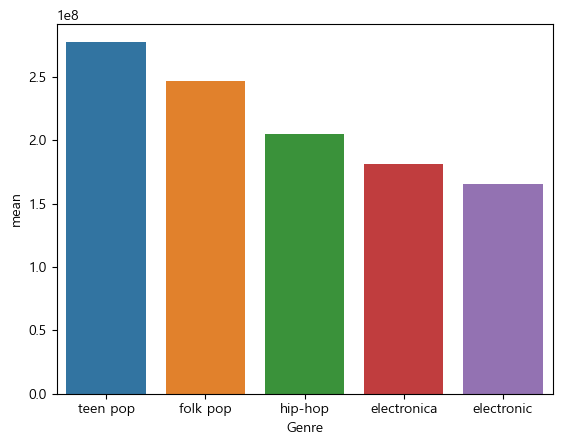

In [147]:

sns.barplot(data = favorite_genre, x = 'Genre', y = 'mean')

plt.show()

In [188]:
favorite_genre['Genre'].to_list()

['teen pop', 'folk pop', 'hip-hop', 'electronica', 'electronic']

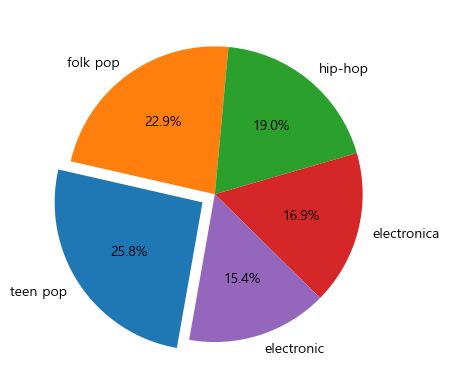

In [196]:
ratio = favorite_genre['mean'].to_list()
labels = favorite_genre['Genre'].to_list()
explode = [0.1, 0, 0, 0,0]

plt.pie(ratio, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, explode=explode)
plt.show()

#### => 현재까지 활동하고 있는 가수 중 사랑받는 장르는 teen pop, folk pop순이다